<a href="https://colab.research.google.com/github/allenz0935/NCHU-MIS/blob/main/%E7%BE%85%E5%81%89%E5%80%AB_week6%E4%BD%9C%E6%A5%AD_%E8%AA%9E%E8%A8%80%E6%A8%A1%E5%9E%8B_Hugging_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>Hugging Face</b>
Hugging Face 網址：https://huggingface.co/

Hugging Face 是 AI 領域的開放平台，像 GitHub 一樣託管並分享 AI 模型與資料集。也收錄了很多來自頂尖研究的模型，涵蓋 NLP、計算機視覺、語音處理等領域。使用者可以在 Hub 上存取、分享、微調模型，加速 AI 的合作與創新。

In [1]:
"""
- datasets 是 Hugging Face 提供的資料集載入工具
- 它整合了數千個公開資料集，包含 NLP、CV、Audio 等領域
- 提供統一的介面來下載、處理和使用資料集
- 支援快取機制，避免重複下載
"""
!pip install datasets

### <b>資料前處理</b>


In [2]:
from datasets import load_dataset

"""
為什麼選擇 auditor_sentiment 資料集？
1. 金融領域專業性：專門針對財務報告和審計意見設計
2. 標籤品質：由金融專家標註，確保情緒分類的準確性
3. 真實場景：模擬實際金融分析師的工作情境
4. 三分類問題：Negative(負面)、Neutral(中性)、Positive(正面)

這個資料集適合用來訓練金融新聞情緒分析模型，
"""

# 使用已轉換好的版本
dataset = load_dataset(
    "FinanceInc/auditor_sentiment",  # 這是轉換後的版本
    #split="train"
)

print(dataset)

print("訓練集：", dataset['train'])
print("測試集：", dataset['test'])

# 查看資料集的欄位名稱與類型
print("訓練集欄位：", dataset["train"].column_names)
print("測試集欄位：", dataset["test"].column_names)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

dataset_infos.json:   0%|          | 0.00/800 [00:00<?, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/327k [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/80.9k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3877 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/969 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 3877
    })
    test: Dataset({
        features: ['sentence', 'label'],
        num_rows: 969
    })
})
訓練集： Dataset({
    features: ['sentence', 'label'],
    num_rows: 3877
})
測試集： Dataset({
    features: ['sentence', 'label'],
    num_rows: 969
})
訓練集欄位： ['sentence', 'label']
測試集欄位： ['sentence', 'label']


In [3]:
# 查看訓練集中前幾筆數據
print("\n訓練集前5筆：")
print(dataset["train"][:5])

# 查看測試集中前幾筆數據
print("\n測試集前5筆：")
print(dataset["test"][:5])

# 查看資料集中有哪些 Keys
print("\n資料集的 keys：", dataset.keys())


訓練集前5筆：
{'sentence': ["Altia 's operating profit jumped to EUR 47 million from EUR 6.6 million .", 'The agreement was signed with Biohit Healthcare Ltd , the UK-based subsidiary of Biohit Oyj , a Finnish public company which develops , manufactures and markets liquid handling products and diagnostic test systems .', 'Kesko pursues a strategy of healthy , focused growth concentrating on sales and services to consumer-customers .', 'Vaisala , headquartered in Helsinki in Finland , develops and manufactures electronic measurement systems for meteorology , environmental sciences , traffic and industry .', 'Also , a six-year historic analysis is provided for these markets .'], 'label': [2, 2, 2, 1, 1]}

測試集前5筆：
{'sentence': ["TeliaSonera TLSN said the offer is in line with its strategy to increase its ownership in core business holdings and would strengthen Eesti Telekom 's offering to its customers .", 'STORA ENSO , NORSKE SKOG , M-REAL , UPM-KYMMENE Credit Suisse First Boston ( CFSB ) ra

In [4]:
from collections import Counter # 計算列表中每個元素的出現次數

"""
為什麼要分析標籤分佈？
1. 檢查類別不平衡(Class Imbalance)問題
   - 如果某類別樣本過少，模型可能學不好該類別
   - 可能需要使用過採樣(oversampling)或欠採樣(undersampling)

2. 了解資料特性
   - 金融文本中，中性(Neutral)通常佔多數
   - 正面和負面情緒相對較少

3. 決定評估指標
   - 如果類別不平衡嚴重，準確率(Accuracy)可能不適合
   - 應該使用 F1-score、Precision、Recall 等指標
"""
# label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
# 計算訓練集標籤出現次數
label_counts_train = Counter(dataset["train"]["label"])
print("\n訓練集標籤分佈：", label_counts_train)

# 計算測試集標籤出現次數
label_counts_test = Counter(dataset["test"]["label"])
print("測試集標籤分佈：", label_counts_test)


訓練集標籤分佈： Counter({1: 2320, 2: 1077, 0: 480})
測試集標籤分佈： Counter({1: 559, 2: 286, 0: 124})


In [5]:
import pandas as pd  # 結構化資料處理套件

"""
為什麼要轉換成 DataFrame？
1. 更直觀的資料檢視：表格形式更容易閱讀和理解
2. 豐富的資料處理功能：pandas 提供大量資料清洗工具
3. 方便進行統計分析：可以快速計算統計量
4. 易於視覺化：可以搭配 matplotlib、seaborn 繪圖
"""

# 轉換為 DataFrame
df_train = pd.DataFrame(dataset["train"])
df_test = pd.DataFrame(dataset["test"])

print("\n訓練集前5筆：")
print(df_train.head())

print("\n測試集前5筆：")
print(df_test.head())


訓練集前5筆：
                                            sentence  label
0  Altia 's operating profit jumped to EUR 47 mil...      2
1  The agreement was signed with Biohit Healthcar...      2
2  Kesko pursues a strategy of healthy , focused ...      2
3  Vaisala , headquartered in Helsinki in Finland...      1
4  Also , a six-year historic analysis is provide...      1

測試集前5筆：
                                            sentence  label
0  TeliaSonera TLSN said the offer is in line wit...      2
1  STORA ENSO , NORSKE SKOG , M-REAL , UPM-KYMMEN...      2
2  Clothing retail chain Sepp+ñl+ñ 's sales incre...      2
3  Lifetree was founded in 2000 , and its revenue...      2
4  Nordea Group 's operating profit increased in ...      2


In [6]:
"""
為什麼要檢查空值和重複值？
1. 空值(Null values)問題
   - 空值會導致模型訓練失敗或產生錯誤
   - 需要決定是刪除還是填補(imputation)

2. 重複值(Duplicates)問題
   - 重複的句子會讓模型過度擬合該樣本
   - 影響模型的泛化能力
   - 可能導致評估指標不準確
"""
# 檢查空值
print("\n訓練集空值：", df_train.isnull().sum())
print("測試集空值：", df_test.isnull().sum())

# 刪除重複值（如果有的話）
df_train.drop_duplicates(subset=["sentence"], inplace=True)
df_test.drop_duplicates(subset=["sentence"], inplace=True)

print("\n訓練集大小：", df_train.shape)
print("測試集大小：", df_test.shape)


訓練集空值： sentence    0
label       0
dtype: int64
測試集空值： sentence    0
label       0
dtype: int64

訓練集大小： (3872, 2)
測試集大小： (969, 2)


In [7]:
train_val_split = dataset["train"].train_test_split(test_size=0.2, seed=42)
train_dataset = train_val_split["train"]
val_dataset = train_val_split["test"]
test_dataset = dataset["test"]
print("\n資料集劃分：")
print(f"訓練集大小：{len(train_dataset)}")
print(f"驗證集大小：{len(val_dataset)} （從訓練集切出，用於訓練過程中的評估）")
print(f"測試集大小：{len(test_dataset)} （保留到最後才使用，避免資訊洩漏）")


資料集劃分：
訓練集大小：3101
驗證集大小：776 （從訓練集切出，用於訓練過程中的評估）
測試集大小：969 （保留到最後才使用，避免資訊洩漏）


In [8]:
from transformers import AutoTokenizer  # AutoTokenizer 可以根據指定的模型名稱，自動選擇和載入與該模型相匹配的分詞器

"""
=============================================================================
【作業 1：模型選擇】
=============================================================================

什麼是 Tokenizer？
- 將文本轉換成模型可以理解的數字序列
- 不同模型有不同的 tokenization 策略
- BERT 使用 WordPiece，將詞切成子詞單元

可選模型比較：

1. bert-base-uncased (預設)
   優點：經典模型，效果穩定，社群資源豐富
   缺點：模型較大(110M參數)，訓練速度較慢
   適用：標準 NLP 任務，對效果要求高

2. distilbert-base-uncased
   優點：BERT 的蒸餾版本，速度快 60%，模型小 40%
   缺點：準確率略低於 BERT (約 2-3%)
   適用：計算資源有限，需要快速迭代

3. roberta-base
   優點：改進的 BERT，通常效果更好
   缺點：訓練時間稍長
   適用：追求更高準確率

4. albert-base-v2
   優點：參數共享技術，模型很小但效果不錯
   缺點：推理速度較慢
   適用：記憶體受限的場景

5. ProsusAI/finbert
   優點：專門在金融文本上預訓練，理解金融術語
   缺點：資料集較小，可能過擬合
   適用：金融領域專業任務（最推薦！）

6. bert-base-chinese
   優點：支援中文
   缺點：英文效果不佳
   適用：中文金融文本分析

評估面向：
✓ 訓練時間
✓ 驗證集 F1-score
✓ 測試集 F1-score
✓ 模型大小
✓ 推理速度
"""
# 使用BERT Tokenizer 進行Tokenization(分詞)
model_name = "ProsusAI/finbert"  # 請修改這裡！

print(f"\n使用的模型：{model_name}")
# ============================================================================

"""
為什麼要使用 AutoTokenizer？
- 自動根據模型名稱載入對應的 tokenizer
- 確保 tokenization 策略與模型匹配
- 避免手動管理不同模型的 tokenizer
"""
from transformers import AutoTokenizer  # AutoTokenizer 可以根據指定的模型名稱，自動選擇和載入與該模型相匹配的分詞器

# 使用指定的 Tokenizer 進行 Tokenization(分詞)
tokenizer = AutoTokenizer.from_pretrained(model_name)


"""
Tokenization 的關鍵參數：

1. padding="max_length"
   - 將所有句子補齊到相同長度
   - 原因：深度學習模型要求批次(batch)內的輸入長度一致
   - 較短的句子會用 [PAD] token 填充

2. truncation=True
   - 截斷超過最大長度的句子
   - BERT 的最大長度通常是 512 tokens
   - 避免超長句子導致記憶體不足

3. return_tensors="pt" (後面會用到)
   - 返回 PyTorch tensor 格式
   - 可以直接輸入模型進行運算
"""

# 定義 Tokenize 函數，用於將句子轉換為 Token
def tokenize_function(example):
    # 使用 tokenizer 將每個句子進行分詞
    # 設定 padding="max_length" 確保所有句子補齊至固定長度
    # 設定 truncation=True 以截斷超過最大長度的句子
    return tokenizer(example["sentence"], padding="max_length", truncation=True)
"""
Tokenization 結果說明：

input_ids：
- 將文字轉換成數字 ID
- 例如：[101, 2043, 2003, 1996, ...]
- 101 是 [CLS] token，表示句子開始
- 102 是 [SEP] token，表示句子結束

attention_mask：
- 標記哪些位置是真實 token (1)，哪些是 padding (0)
- 讓模型知道應該關注哪些部分

token_type_ids：
- 區分不同句子（在句子對任務中使用）
- 在單句分類中全部為 0
"""
# 對訓練集、驗證集和測試集進行 Tokenize
tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_val = val_dataset.map(tokenize_function, batched=True)
tokenized_test = test_dataset.map(tokenize_function, batched=True)


使用的模型：ProsusAI/finbert


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/3101 [00:00<?, ? examples/s]

Map:   0%|          | 0/776 [00:00<?, ? examples/s]

Map:   0%|          | 0/969 [00:00<?, ? examples/s]

In [9]:
# 查看 Tokenized 資料
print("\nTokenized 訓練集第一筆：")
print(tokenized_train[:1])

print("\nTokenized 驗證集第一筆：")
print(tokenized_val[:1])

print("\nTokenized 測試集第一筆：")
print(tokenized_test[:1])
# 確認 tokenized_datasets 是否包含需要的欄位
print("\n訓練集特徵：", tokenized_train.features)
print("驗證集特徵：", tokenized_val.features)
print("測試集特徵：", tokenized_test.features)


Tokenized 訓練集第一筆：
{'sentence': ["The financial impact is estimated to be some 1.5 MEUR annual improvement in the division 's result , starting from fiscal year 2007 ."], 'label': [2], 'input_ids': [[101, 1996, 3361, 4254, 2003, 4358, 2000, 2022, 2070, 1015, 1012, 1019, 2033, 3126, 3296, 7620, 1999, 1996, 2407, 1005, 1055, 2765, 1010, 3225, 2013, 10807, 2095, 2289, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### <b>建立模型</b>

In [10]:
import torch  # 深度學習框架
"""
為什麼要檢查 GPU？
- GPU 的平行運算能力遠超 CPU（通常快 10-100 倍）
- 深度學習涉及大量矩陣運算，適合 GPU 加速
- 如果有 GPU 可用，應該優先使用

CUDA 是什麼？
- NVIDIA 的平行運算平台
- PyTorch 透過 CUDA 調用 GPU
- torch.cuda.is_available() 檢查是否有可用的 GPU
"""
# 如果有GPU就用GPU，沒有GPU用CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [11]:
from transformers import AutoModelForSequenceClassification  # 序列分類模型
"""
什麼是遷移學習(Transfer Learning)？

1. 預訓練(Pre-training)階段
   - 在大規模文本語料上預訓練
   - 學習通用的語言理解能力
   - BERT 在 BookCorpus 和 Wikipedia 上訓練

2. 微調(Fine-tuning)階段
   - 在特定任務上微調模型
   - 只需要較少的標註資料
   - 適應特定領域（如金融文本）

為什麼設定 num_labels=3？
- 我們的任務是三分類：Negative, Neutral, Positive
- 模型最後會輸出 3 個分數(logits)
- 透過 softmax 轉換成機率分佈

model.to(device) 的作用？
- 將模型參數移動到 GPU 上
- 確保模型和輸入資料在同一個裝置
"""

# 載入模型（使用作業區域 1 選擇的模型）
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)
model.to(device)  # 將模型移到對應裝置

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [12]:
from transformers import TrainingArguments  # 包裝訓練參數

training_args = TrainingArguments(
    output_dir="./results",          # 訓練結果的儲存位置，包括模型檔案和預測結果。
    eval_strategy="epoch",     # 設置評估策略為每個訓練輪次（epoch）結束後進行一次評估。
    learning_rate=2e-5,              # 設置學習率，這裡使用 2e-5，通常較小的學習率更適合微調預訓練模型。
    per_device_train_batch_size=4,   # 設定每個裝置（如每張 GPU）的訓練批次大小為 4。
    per_device_eval_batch_size=4,    # 設定每個裝置的評估批次大小為 4。
    num_train_epochs=3,              # 訓練輪次設定為 3，模型將完整遍歷訓練集三次。
    weight_decay=0.01,               # 設置權重衰減（L2正則化）參數，這裡為 0.01，用於防止過擬合。
    logging_dir="./logs",            # 日誌存放目錄，用於儲存 TensorBoard 或其他日誌。
    logging_steps=10,                # 設置每 10 個步驟記錄一次訓練信息，便於監控訓練過程。
    report_to="none",                 # 不將訓練日誌發送到任何平臺（如 TensorBoard），可以改為 "tensorboard" 以啟用。
)

In [13]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

"""
為什麼需要這些評估指標？

1. Accuracy (準確率)
   公式：(預測正確的樣本數) / (總樣本數)
   優點：直觀易懂
   缺點：在類別不平衡時會誤導

2. Precision (精確率)
   公式：(真正例) / (真正例 + 假正例)
   意義：預測為正例的樣本中，真正為正例的比例
   應用：當誤報代價高時重視精確率

3. Recall (召回率)
   公式：(真正例) / (真正例 + 假負例)
   意義：所有正例中，被正確預測的比例
   應用：當漏報代價高時重視召回率

4. F1-score (F1分數)
   公式：2 * (Precision * Recall) / (Precision + Recall)
   意義：精確率和召回率的調和平均
   優點：綜合考慮兩者，適合類別不平衡

為什麼使用 average="weighted"？
- 根據每個類別的樣本數加權平均
- 考慮類別不平衡的影響
- 更能反映整體表現

在金融情緒分析中的重要性：
- Precision 高：減少誤判（例如誤把中性當成正面）
- Recall 高：不錯過重要信號（例如不漏掉負面新聞）
- F1-score 高：整體表現好
"""

def compute_metrics(pred):
    labels = pred.label_ids  # 取得真實值的id
    preds = np.argmax(pred.predictions, axis=1)  # 預測值找到最高機率的索引
    accuracy = accuracy_score(labels, preds)  # 計算準確率
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="weighted")  # 計算其他指標
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

In [14]:
from transformers import Trainer

"""
Trainer 類別的作用：
- 封裝了完整的訓練流程
- 自動處理：
  ✓ 梯度計算和參數更新
  ✓ 批次資料載入
  ✓ 學習率調整
  ✓ 驗證集評估
  ✓ Checkpoint 儲存
  ✓ 日誌記錄

為什麼使用高階 API？
- 減少樣板代碼(boilerplate code)
- 避免常見錯誤
- 專注於模型和資料
- 便於快速實驗

訓練過程中會發生什麼？
1. 前向傳播(Forward pass)
   - 輸入資料經過模型，得到預測結果

2. 計算損失(Loss calculation)
   - 比較預測結果和真實標籤
   - 使用交叉熵損失(Cross-entropy loss)

3. 反向傳播(Backward pass)
   - 計算損失對參數的梯度

4. 參數更新(Parameter update)
   - 使用梯度和學習率更新參數
   - 優化器：AdamW (Adam with weight decay)

5. 驗證評估(Validation)
   - 每個 epoch 結束後在驗證集上評估
   - 不更新參數，只計算指標
"""

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,  # 使用訓練集
    eval_dataset=tokenized_val,     # 使用驗證集（從訓練集切出來的）
    compute_metrics=compute_metrics,
)

# 開始訓練
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.236900,0.490565,0.872423,0.874108,0.872423,0.869854
2,0.278600,0.608179,0.868557,0.875764,0.868557,0.870047
3,0.001900,0.620478,0.876289,0.877076,0.876289,0.876593


TrainOutput(global_step=2328, training_loss=0.3154320978536351, metrics={'train_runtime': 1172.8795, 'train_samples_per_second': 7.932, 'train_steps_per_second': 1.985, 'total_flos': 2447744125123584.0, 'train_loss': 0.3154320978536351, 'epoch': 3.0})

### <b>結果評估</b>

In [15]:
# 評估模型在驗證集的表現

print("\n=== 驗證集評估結果 ===")
val_result = trainer.evaluate(eval_dataset=tokenized_val)
print(val_result)


=== 驗證集評估結果 ===


{'eval_loss': 0.6204783320426941, 'eval_accuracy': 0.8762886597938144, 'eval_precision': 0.877075862841775, 'eval_recall': 0.8762886597938144, 'eval_f1': 0.876592504682786, 'eval_runtime': 23.2535, 'eval_samples_per_second': 33.371, 'eval_steps_per_second': 8.343, 'epoch': 3.0}


In [16]:
# 評估模型在測試集的表現（最終評估）
print("\n=== 測試集評估結果（最終評估）===")
test_result = trainer.evaluate(eval_dataset=tokenized_test)
print(test_result)


=== 測試集評估結果（最終評估）===


{'eval_loss': 0.6447749137878418, 'eval_accuracy': 0.8720330237358102, 'eval_precision': 0.8732292913913698, 'eval_recall': 0.8720330237358102, 'eval_f1': 0.872451745069848, 'eval_runtime': 29.3019, 'eval_samples_per_second': 33.069, 'eval_steps_per_second': 8.293, 'epoch': 3.0}


### <b2>使用測試集進行預測展示</b>


In [17]:
# 先展示測試集中的句子，讓學生了解有哪些資料
print("\n=== 測試集句子展示 ===")
print("以下是測試集中的前 50 個句子：\n")

label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}

for i in range(50):
    sentence = test_dataset[i]["sentence"]
    label = test_dataset[i]["label"]
    print(f"[{i}] {sentence}")
    print(f"    真實標籤：{label_map[label]}\n")


=== 測試集句子展示 ===
以下是測試集中的前 50 個句子：

[0] TeliaSonera TLSN said the offer is in line with its strategy to increase its ownership in core business holdings and would strengthen Eesti Telekom 's offering to its customers .
    真實標籤：Positive

[1] STORA ENSO , NORSKE SKOG , M-REAL , UPM-KYMMENE Credit Suisse First Boston ( CFSB ) raised the fair value for shares in four of the largest Nordic forestry groups .
    真實標籤：Positive

[2] Clothing retail chain Sepp+ñl+ñ 's sales increased by 8 % to EUR 155.2 mn , and operating profit rose to EUR 31.1 mn from EUR 17.1 mn in 2004 .
    真實標籤：Positive

[3] Lifetree was founded in 2000 , and its revenues have risen on an average by 40 % with margins in late 30s .
    真實標籤：Positive

[4] Nordea Group 's operating profit increased in 2010 by 18 percent year-on-year to 3.64 billion euros and total revenue by 3 percent to 9.33 billion euros .
    真實標籤：Positive

[5] Operating profit for the nine-month period increased from EUR3 .1 m and net sales increased fr

In [18]:
# 請從上面顯示的測試集句子中，選擇你想要測試的句子索引
#
# 選擇特定的句子索引
# 例如：test_indices = [0, 5, 10, 15, 19]
#
# 提示：
# - 可以選擇不同情緒的句子來測試
# - 觀察模型在哪些句子上預測正確，哪些預測錯誤
# - 思考為什麼模型會預測錯誤

test_indices = [4, 8, 11, 35, 49]  # 請修改這裡！選擇你想測試的句子索引

print(f"\n你選擇測試的句子索引：{test_indices}")
# ============================================================================

# 根據選擇的索引，取得測試句子
test_texts = [test_dataset[i]["sentence"] for i in test_indices]
true_labels = [test_dataset[i]["label"] for i in test_indices]

print("\n=== 開始預測 ===\n")

"""
預測流程說明：

1. 取得測試句子和真實標籤
   - 根據選擇的索引提取句子

2. Tokenization
   - 將句子轉換成模型輸入格式
   - return_tensors="pt" 返回 PyTorch tensor

3. 模型推理
   - 將 tokenized 資料輸入模型
   - 得到 logits（未標準化的分數）

4. 預測類別
   - 使用 argmax 取得分數最高的類別
   - 轉換回 CPU 以便後續處理

5. 結果展示
   - 顯示原始句子、真實標籤、預測標籤
   - 標記預測是否正確
   - 計算準確率
"""

# Tokenize 測試句子
test_encodings = tokenizer(test_texts, truncation=True, padding=True, return_tensors="pt").to(device)
outputs = model(**test_encodings)

# 取得預測結果
preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()  # 將結果轉回 CPU 以便處理

# 顯示預測結果
predicted_labels = [label_map[pred] for pred in preds]
true_labels_text = [label_map[label] for label in true_labels]

# 計算準確率
correct = sum([1 for true, pred in zip(true_labels_text, predicted_labels) if true == pred])
accuracy = correct / len(test_texts) * 100

print(f"你選擇的 {len(test_texts)} 個句子的預測結果：\n")

for i, (idx, text, true_label, pred_label) in enumerate(zip(test_indices, test_texts, true_labels_text, predicted_labels)):
    correct_mark = "✓ 正確" if true_label == pred_label else "✗ 錯誤"
    print(f"{i+1}. 測試集索引 [{idx}]")
    print(f"   句子：{text}")
    print(f"   真實標籤：{true_label}")
    print(f"   預測標籤：{pred_label}")
    print(f"   結果：{correct_mark}\n")

print(f"準確率：{correct}/{len(test_texts)} = {accuracy:.2f}%")


你選擇測試的句子索引：[4, 8, 11, 35, 49]

=== 開始預測 ===

你選擇的 5 個句子的預測結果：

1. 測試集索引 [4]
   句子：Nordea Group 's operating profit increased in 2010 by 18 percent year-on-year to 3.64 billion euros and total revenue by 3 percent to 9.33 billion euros .
   真實標籤：Positive
   預測標籤：Positive
   結果：✓ 正確

2. 測試集索引 [8]
   句子：Net income from life insurance rose to EUR 16.5 mn from EUR 14.0 mn , and net income from non-life insurance to EUR 22.6 mn from EUR 15.2 mn in 2009 .
   真實標籤：Positive
   預測標籤：Positive
   結果：✓ 正確

3. 測試集索引 [11]
   句子：KESKO CORPORATION STOCK EXCHANGE RELEASE 28.02.2008 AT 09.30 1 ( 1 ) Kesko Corporation and Aspo plc today signed an agreement by which Aspo acquires the share capital of Kauko-Telko Ltd , a subsidiary wholly owned by Kesko .
   真實標籤：Positive
   預測標籤：Positive
   結果：✓ 正確

4. 測試集索引 [35]
   句子：Diluted earnings per share ( EPS ) rose to EUR 3.68 from EUR 0.50 .
   真實標籤：Positive
   預測標籤：Positive
   結果：✓ 正確

5. 測試集索引 [49]
   句子：Operating profit totaled EUR 37,7 mn , up slightly from

### <b2>解決Github_Invalid_Notebook</b>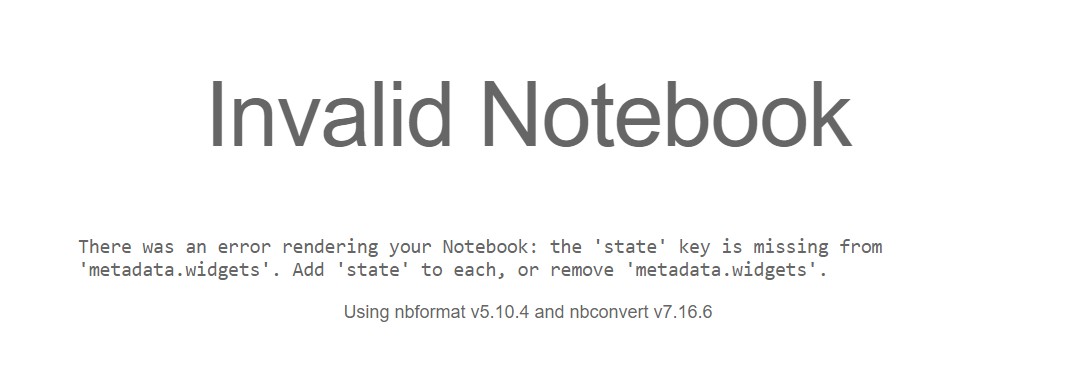


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
!find /content -name "羅偉倫_week6作業-語言模型 Hugging Face"

/content/drive/MyDrive/Colab Notebooks/羅偉倫_week6作業-語言模型 Hugging Face


In [23]:
!jupyter nbconvert --ClearMetadataPreprocessor.enabled=True --inplace --to notebook ‘路徑名稱‘

[NbConvertApp] WARNING | pattern '‘路徑名稱‘' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute th